# Quarta Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Um sinal anexo a este documento possui 3 componentes estacionárias (30Hz, 300Hz e
520Hz) com diferentes amplitudes e algum ruído. Ele foi contaminado com um sinal de curta
duração (componentes 6kHz e 7kHz) cujo instante de ocorrência é desconhecido. Utilizando
a Correlação Cruzada, encontre o instante em que este sinal contaminante aparece no sinal
principal e estime sua duração.

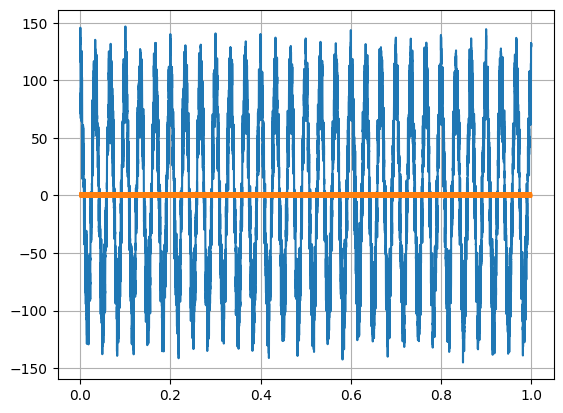

Maximum correlation peak (index): 30859
Correlation value at peak: 4598.100324754287


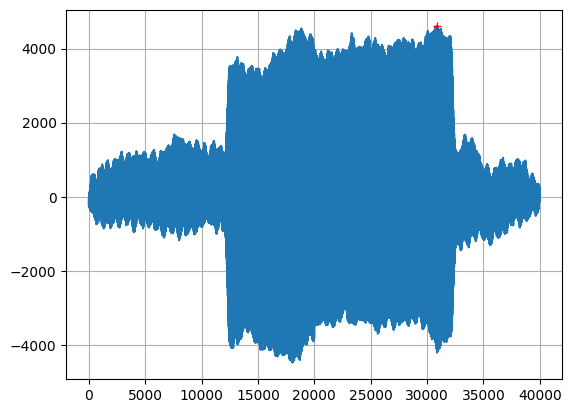

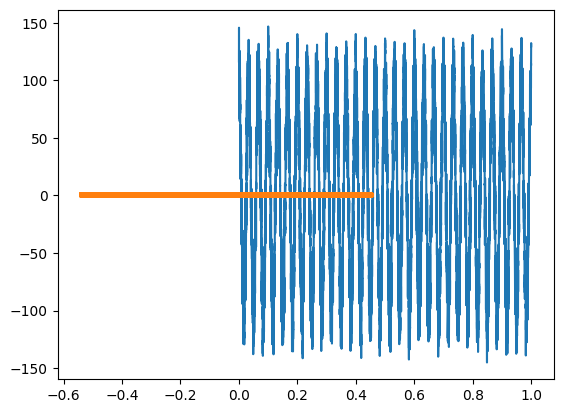

Estimated duration of the contaminating signal: 0.61985


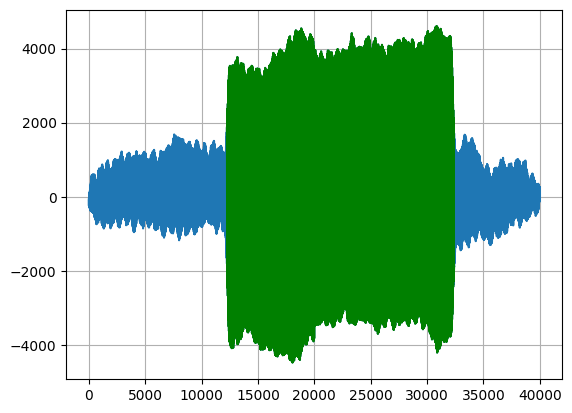

In [1]:
import matplotlib.pyplot as plt
import numpy as np

with open('sinalContaminado.npy', 'rb') as s:
    Ts = np.load(s) 
    sc = np.load(s)

t = np.arange(0,len(sc)*Ts,Ts)

cont_signal = np.cos(2*np.pi*6000*t) + np.cos(2*np.pi*7000*t)

fig = plt.figure(1)
plt.cla()
plt.plot(t,sc,t,cont_signal)
plt.grid(True)
plt.show()

cc = np.correlate(sc, cont_signal, mode='full')

pmax = np.argmax(np.abs(cc))
print('Maximum correlation peak (index):', pmax)
print('Correlation value at peak:', cc[pmax])

plt.figure(2)
plt.cla()
plt.plot(cc)

plt.plot(pmax, cc[pmax], 'r+')

plt.grid(True)
plt.show()

lag = (pmax - len(sc)) * Ts

fig3 = plt.figure(3)
plt.cla()
plt.plot(t, sc)
plt.plot(t-lag,cont_signal)
plt.show()

threshold = 0.4 * np.max(np.abs(cc))
contaminating = np.where(np.abs(cc) > threshold)[0]

t_start = (contaminating[0] - len(sc)) * Ts
if t_start < 0:
    t_start = 0
t_end = (contaminating[-1] -len(sc)) * Ts

estimated_duration = t_end - t_start

print('Estimated duration of the contaminating signal:', estimated_duration)

plt.figure(4)
plt.cla()
plt.plot(cc)
plt.plot(contaminating, cc[contaminating], 'g')
plt.grid(True)
plt.show()


### Exercício 2 ###
Neste exercício deve-se usar a Transformada Discreta de Fourier (deve-se usar o algoritmo dado acima) para <u>identificar dígitos codificados em sinais DTFM</u> que modulam em amplitude uma portadora de 4,0kHz e que respeite o modelo de transmissão sequencial com um intervalo de tempo para cada dígito. Nos sinais a serem decodificados (escolher o sinal fornecido com o número correspondente ao último algarismo de seu número de matrícula), os códigos DTFM respeitam a <u>Tabela 02</u> e ocupam um intervalo de 0,02s cada. A estrutura da mensagem é apresentada na Figura 01. O sinal foi amostrado a 20kHz.


2800.0 | 0.0500
3400.0 | 0.0500
4000.0 | 0.1000
4600.0 | 0.0500
5200.0 | 0.0500


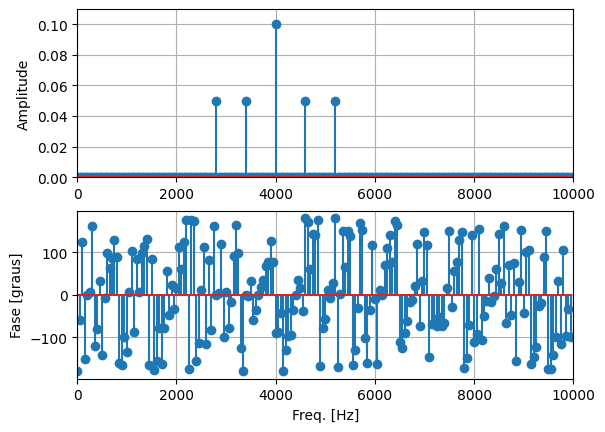

2900.0 | 0.0500
3500.0 | 0.0500
4000.0 | 0.1000
4500.0 | 0.0500
5100.0 | 0.0500


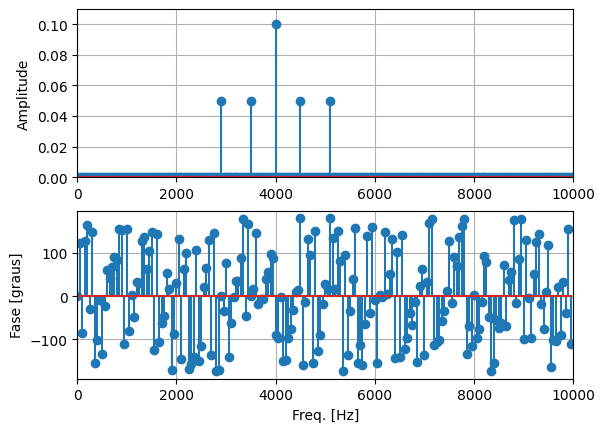

3000.0 | 0.0500
3200.0 | 0.0500
4000.0 | 0.1000
4800.0 | 0.0500
5000.0 | 0.0500


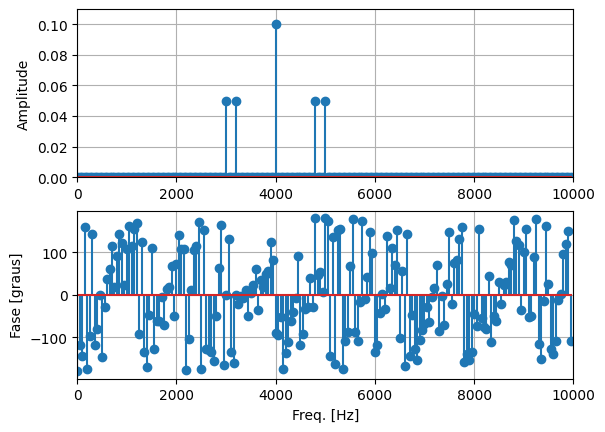

3100.0 | 0.0500
3300.0 | 0.0500
4000.0 | 0.1000
4700.0 | 0.0500
4900.0 | 0.0500


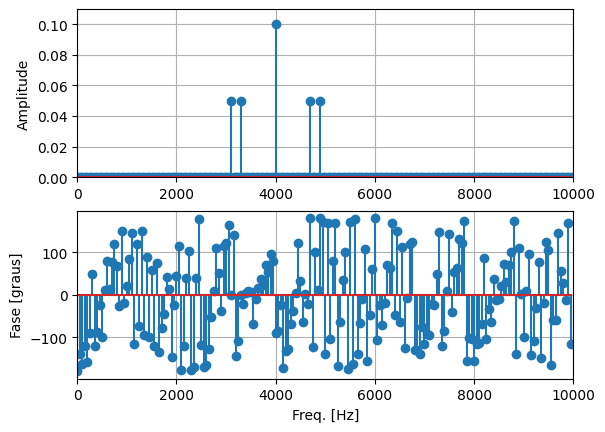

2800.0 | 0.0500
3300.0 | 0.0500
4000.0 | 0.1000
4700.0 | 0.0500
5200.0 | 0.0500


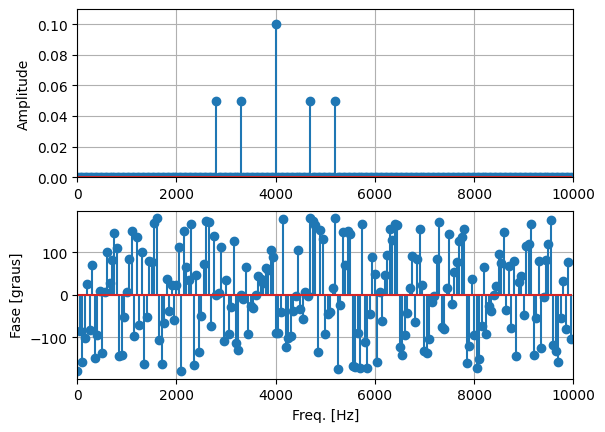

In [2]:
from espectro import espectro1D

with open('DTMF-s3.npy', 'rb') as s:
    Ts3 = np.load(s)
    s3 = np.load(s)

d1 = s3[0:400]
d2 = s3[400:800]
d3 = s3[800:1200]
d4 = s3[1200:1600]
d5 = s3[1600:2000]

espectro1D(d1, 20000, 1)
espectro1D(d2, 20000, 1)
espectro1D(d3, 20000, 1)
espectro1D(d4, 20000, 1)
espectro1D(d5, 20000, 1)

Assim, analisando os intervalos dos dígitos e as frequências das componentes e comparando com os valores das tabelas:\
Dígito 1 - 3 (600Hz e 1200Hz)\
Dígito 2 - B (500Hz e 1100Hz)\
Dígito 3 - 7 (800Hz e 1000Hz)\
Dígito 4 - 0 (700Hz e 900Hz)\
Dígito 5 - 2 (700Hz e 1200Hz)